In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('/content/data - Sheet1 (1).csv',header=None)
X = dataset1[0].values
y = dataset1[1].values
print(dataset1)

     0    1
0    1   12
1    3   16
2    5   20
3    7   24
4    9   28
5   11   32
6   13   36
7   15   40
8   17   44
9   19   48
10  21   52
11  23   56
12  25   60
13  27   64
14  29   68
15  31   72
16  33   76
17  35   80
18  37   84
19  39   88
20  41   92
21  43   96
22  45  100
23  47  104
24  49  108
25  51  112
26  53  116
27  55  120
28  57  124
29  59  128
30  61  132
31  63  136
32  65  140
33  67  144
34  69  148
35  71  152
36  73  156
37  75  160
38  77  164
39  79  168
40  81  172
41  83  176
42  85  180
43  87  184
44  89  188
45  91  192
46  93  196
47  95  200
48  97  204
49  99  208


In [ ]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X.shape,y.shape

((50, 1), (50, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
### Name: GAUTHAM KRISHNA S 
### Register Number: 212223240036
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1,10)
        self.fc2=nn.Linear(10,14)
        self.fc3=nn.Linear(14,1)
        self.relu=nn.ReLU()
        self.history = {'loss': []}


  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x





In [ ]:
# Initialize the Model, Loss Function, and Optimizer
# Write your code here
ai_brain=NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [ ]:
# Name:
# Register Number:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    # Write your code here
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ai_brain(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 0.016815
Epoch [200/2000], Loss: 0.016709
Epoch [400/2000], Loss: 0.016722
Epoch [600/2000], Loss: 0.016695
Epoch [800/2000], Loss: 0.016680
Epoch [1000/2000], Loss: 0.016630
Epoch [1200/2000], Loss: 0.016597
Epoch [1400/2000], Loss: 0.016576
Epoch [1600/2000], Loss: 0.016545
Epoch [1800/2000], Loss: 0.016528


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 0.016742


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

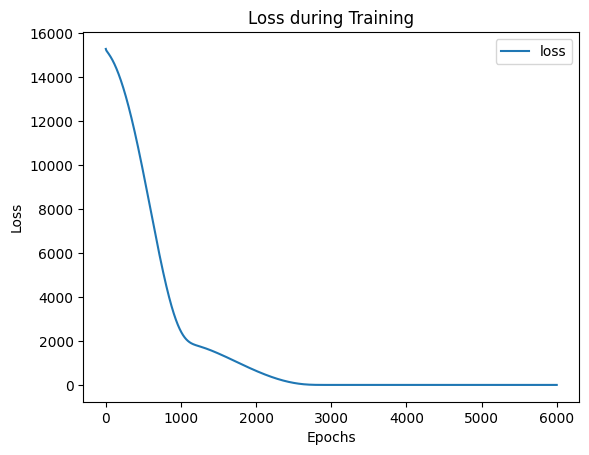

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 28.066024780273438


In [ ]:
X_n1_1 = torch.tensor([[12]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 34.070152282714844
